# **<span style='color:#F76241'>|</span>Master Thesis - Digital Driven Business  </b>**
### Survey Analysis for Quatt market Research- David Andrew - 500903075
## <font > **Structure:** </font>
1. [Introduction](#1-Introduction)<br>
    1.1 [Main Research question](#1.1Research-question)<br>
    1.2 [Sub Research question](#1.1Research-question)<br>
    1.3 [Data Importation](#1.2-Dataset)<br>
2. [EDA - Demographics Distribution](#2-Dataset)<br>
    2.1 [Age Distribution](#1.1-Data-Preparation-and-Preprocessing)<br>
    2.2 [Gender Distribution ](#2.2-Filtering-the-Dataset)<br>
    2.3 [Education Distribution](2.3-Data-Visualizations)<br>
    2.4 [Marital Status Distribution](2.4-Train/Validation/Testset-Splitting)<br>
    2.5 [Household Composition Distribution](2.5-Train/Validation/Testset-Splitting)<br>
    2.6 [Top 5 Countries by Respondents](2.6-Train/Validation/Testset-Splitting)<br>
3. [Hypothesis Testing](#3-Sub-Question)<br>
    3.1 [Hypothesis 1: Higher educational levels will positively impact awareness of AI heat pumps in European households.](#3.1-)<br>
            3.1.1 [Chi-Square Test - Hypothesis 1](3.1.1-Jokes-similarity)<br>
            3.1.2 [Logistic Regression](#5.2-)<br>
            3.1.3 [Checking for Normality of Residuals](#5.2-)<br>
    3.2 [Hypothesis 2: Higher income brackets will positively impact awareness of AI heat pumps in European households.](3.1.1-Jokes-similarity)<br>
            3.2.1 [Chi-Square Test - Hypothesis 2](3.1.1-Jokes-similarity)<br>
            3.2.2 [Logistic Regression - Hypothesis 2](#5.2-)<br>
            3.2.3 [Checking for Multicollinearity (VIF)](#5.2-)<br>
    3.3 [Hypothesis 3: Demographic factors have a positive impact on the likelihood to adopt AI heat pumps in European households.](3.1.1-Jokes-similarity)<br>
            3.3.1 [Correlation Analysis](3.1.1-Jokes-similarity)<br>
            3.3.2 [Feature engineering](#5.2-)<br>
            3.3.3 [Checking for Multicollinearity (VIF)](#5.2-)<br>
            3.3.4 [Multiple Linear Regression](#5.2-)<br>
            3.3.5 [Checking for Linearity](#5.2-)<br>
            3.3.6 [Checking for Normality of Residuals](#5.2-)<br>
    3.4 [Hypothesis 4: Cost savings positively impacts adoption likelihood of AI heat pumps than other adoption influencers.](3.1.1-Jokes-similarity)<br>
            3.4.1 [Multiple linear regression analysis - Hypothesis 4](#5.2-)<br>
            3.4.2 [Checking for Linearity](#5.2-)<br>
            3.4.3 [Checking for Normality of Residuals](#5.2-)<br>
            3.4.4 [Further Analysis to show the association between the adoption influencers and the Decision to adopt of AI heat pumps](#5.2-)<br>
    3.5 [Hypothesis 5: High upfront costs negatively impact the adoption decision of AI-based heat pumps in Europe.](3.1.1-Jokes-similarity)<br>
    3.6 [Hypothesis 6: Countries that have stronger green energy policies and subsidies have a positive impact on adoption likelihood of AI heat pumps.](3.1.1-Jokes-similarity)<br>

## <b>1<span style='color:#F76241'>|</span> Introduction </b>


**<span style='color:#F76241'>1.1 Main Research question:</span>** </br>
What are the key factors influencing the European AI-heat pump market, and how can Quatt position itself to seize new opportunities?

**<span style='color:#F76241'>1.2 Sub Research questions:</span>** </br>
   
1. How does the level of awareness and understanding about AI heat pumps differ across various demographics in Europe? Are there any particular demographic groups that show a higher propensity to adopt these technologies?
   
2. What are the prevailing attitudes and perceptions towards AI heat pumps among consumers in different European countries, and how do these attitudes affect their buying decisions?
   
3. What are the potential barriers to adoption of AI-based heat pumps in Europe?
   
4. What incentives, subsidies, or policies exist in various European countries that might encourage or discourage the adoption of AI heat pumps? How can Quatt leverage these factors to its advantage?

5. How is the competitive landscape structured for the AI heat pump market in Europe? Who are Quatt's main competitors, and what strategies have they employed to gain market share? How can Quatt differentiate itself in this market?

For the purpose of the research, this code will focus only on the hypothesis testing for outlined below to answer the research questions:

- Hypothesis 1 - Higher educational levels will positively impact awareness of AI heat pumps in European households.<br>
- Hypothesis 2 - Higher income brackets will positively impact awareness of AI heat pumps in European households.<br>
- Hypothesis 3 - Demographic factors have a positive impact on the likelihood to adopt AI heat pumps in European households.<br>
- Hypothesis 4 - Cost savings positively impacts adoption likelihood of AI heat pumps than other adoption influencers.<br>
- Hypothesis 5 - High upfront costs negatively impact the adoption decision of AI-based heat pumps in Europe.<br>
- Hypothesis 6 - Countries that have stronger green energy policies and subsidies have a positive impact on adoption likelihood of AI heat pumps.<br>


</br>

</div>

### <b>1.3<span style='color:#F76241'>|</span> Data Importation</b>

In [1]:
# importing libraries
import json #library for working with JSON files
import os #library for 
import gc #garbage collector library for saving RAM
import pandas as pd #pandas dataframe library
import numpy as np #numpy array library
import matplotlib.pyplot as plt #library for plotting 
import seaborn as sns #seaborn library for visualization
import branca.colormap as cm    #library for color mapping
import plotly.express as px #plotly library for visualization

import statsmodels.api as sm 
from statsmodels.formula.api import ols #
import scipy.stats as stats #library for statistical analysis
from scipy.stats import chi2_contingency #library for chi-square test
from scipy.stats import f_oneway #library for ANOVA test
from statsmodels.stats.proportion import proportions_ztest #library for z-test
from statsmodels.formula.api import logit #library for logistic regression model

In [2]:
#reading the csv files
quatt_df = pd.read_csv("C:/Users/User/Dropbox/PC/Desktop/Masters DDB/Master project/Thesis Work/Quatt Survey Analysis/Quatt_Survey_results.csv")
global_eti = pd.read_csv("C:/Users/User/Dropbox/PC/Desktop/Masters DDB/Master project/Thesis Work/Quatt Survey Analysis/global-ETI-2023-by-select-country.csv")

In [3]:
#create a column that maps the countries to their respective ETI values
quatt_df['green_policy_score'] = quatt_df['Country'].map(global_eti.set_index('Country')['ETI'])

In [4]:
#checking the shape
quatt_df.shape

(141, 23)

In [5]:
quatt_df.head()

,Age,Gender,Education,Marital Status,Residence Type,House Composition,Household Income,Country,Q1,Q2,...,Q6_1,Q6_2,Q6_3,Q7,Q8,Q8_4_TEXT,Q9,Q10,Participant_ID,green_policy_score
0,35 - 44,Male,Postgraduate Degree,Married or domestic partnership,Single Family Detached Home,Family with young children (under 18),"Over €100,000",Netherlands,No,NaN,...,Very important,Moderately important,Extremely important,Extremely unlikely,Other (please specify),I prefer to heat my home with wood,Up to € 500,No,4271.0,68.8
1,below 25,Female,Bachelors Degree,Single/never married,Single Family Detached Home,Family with adult children (18 or older),"€80,000 - €99,999",Netherlands,No,NaN,...,Moderately important,Very important,Very important,Neither likely nor unlikely,High installation costs,NaN,"More than € 2,000",Yes,8130.0,68.8
2,25 - 34,Female,Bachelors Degree,Single/never married,Single Family Detached Home,Multi-generational family,"€40,000 - €59,999",Netherlands,No,NaN,...,Extremely important,Very important,Extremely important,Extremely unlikely,Other (please specify),Security concerns/hackable data,"Up to € 1,000",Yes,8273.0,68.8
3,55 - 65,Male,Bachelors Degree,Married or domestic partnership,Single Family Detached Home,Family with adult children (18 or older),"Over €100,000",Netherlands,Yes,I understand it very well,...,Extremely important,Extremely important,Very important,Extremely unlikely,Other (please specify),I already posses the Quatt Hybrid Duo,"More than € 2,000",Yes,5650.0,68.8
4,NaN,NaN,Postgraduate Degree,Single/never married,Single Family Detached Home,Couple without children,"€40,000 - €59,999",Netherlands,No,NaN,...,Extremely important,Moderately important,Extremely important,Extremely likely,Concerns about maintenance and reliability,NaN,"Up to € 1,000",NaN,2649.0,68.8


In [6]:
#column names
quatt_df.columns

Index(['Age', 'Gender', 'Education', 'Marital Status', 'Residence Type',
       'House Composition', 'Household Income', 'Country', 'Q1', 'Q2', 'Q3',
       'Q4', 'Q5', 'Q6_1', 'Q6_2', 'Q6_3', 'Q7', 'Q8', 'Q8_4_TEXT', 'Q9',
       'Q10', 'Participant_ID', 'green_policy_score'],
      dtype='object')

In [7]:
#Some basic analysis of the Quatt survey data
quatt_df.describe()

,Participant_ID,green_policy_score
count,140.000000,100.00000
mean,5563.828571,67.24900
std,2721.632273,7.48239
min,1016.000000,0.00000
25%,2804.250000,68.80000
50%,5893.000000,68.80000
75%,8159.000000,68.80000
max,9741.000000,76.10000


## <b>2 <span style='color:#F76241'>|</span> EDA - Demographics Distribution </b>

### 2.1 <span style='color:#F76241'>|</span> Age Distribution

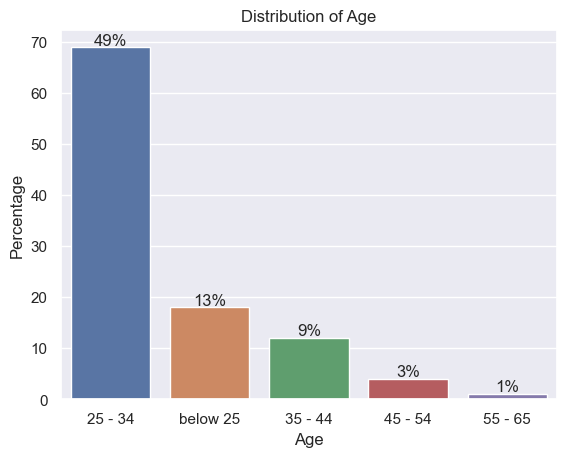

In [8]:
#Age distribution of the respondents
sns.set(style="darkgrid")

# Calculate the total count of individuals
total_count = len(quatt_df)
age_counts = quatt_df['Age'].value_counts()

# Calculate the percentage values
percentage_values = [(count / total_count) * 100 for count in age_counts]

# Sort the age categories based on the percentage values in descending order
sorted_age_counts = age_counts.sort_values(ascending=False)
sorted_percentage_values = [(count / total_count) * 100 for count in sorted_age_counts]

# Plot the countplot
ax = sns.countplot(x='Age', data=quatt_df, order=sorted_age_counts.index)

# Add percentage labels on top of each bar
for p, percentage in zip(ax.patches, sorted_percentage_values):
    ax.annotate(f'{round(percentage)}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set plot title and labels
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Percentage')

# Show the plot
plt.show()


### 2.2 <span style='color:#F76241'>|</span> Gender Distribution 

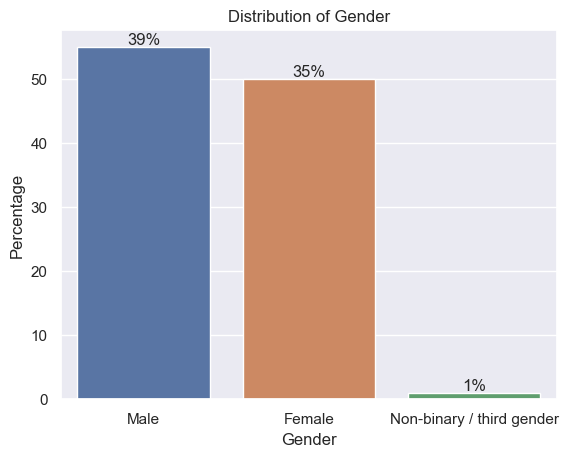

In [9]:
#Gender distribution of the respondents
sns.set(style="darkgrid")

# Calculate the total count of each gender
total_count = len(quatt_df)
gender_counts = quatt_df['Gender'].value_counts()

# Calculate the percentage values
percentage_values = [(count / total_count) * 100 for count in gender_counts]

# Plot the countplot
ax = sns.countplot(x='Gender', data=quatt_df)

# Add percentage labels on top of each bar
for p, percentage in zip(ax.patches, percentage_values):
    ax.annotate(f'{round(percentage)}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set plot title and labels
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')

# Show the plot
plt.show()


The above graph shows the distribution of the respondents by their gender. It shows that Males make up the majority of the survey

### 2.3 <span style='color:#F76241'>|</span> Education Distribution

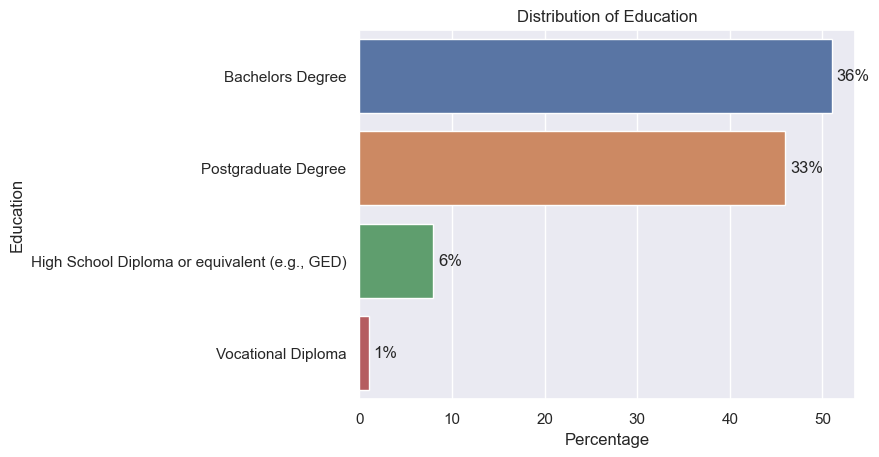

In [10]:
# Education distribution of the respondents
sns.set(style="darkgrid")

# Calculate the total count of each education level
total_count = len(quatt_df)
education_counts = quatt_df['Education'].value_counts()

# Sort the education levels based on the percentage values in ascending order
sorted_education_counts = education_counts.sort_values(ascending=False)
sorted_percentage_values = [(count / total_count) * 100 for count in sorted_education_counts]

# Plot the countplot
ax = sns.countplot(y='Education', data=quatt_df, order=sorted_education_counts.index)

# Add percentage labels on top of each bar
for i, p in enumerate(ax.patches):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()    
    ax.annotate(f'{round(sorted_percentage_values[i])}%', (x + width + 0.5, y + height / 2), va='center')

# Set plot title and labels
plt.title('Distribution of Education')
plt.xlabel('Percentage')
plt.ylabel('Education')

# Show the plot
plt.show()


### 2.4 <span style='color:#F76241'>|</span> Marital Status Distribution

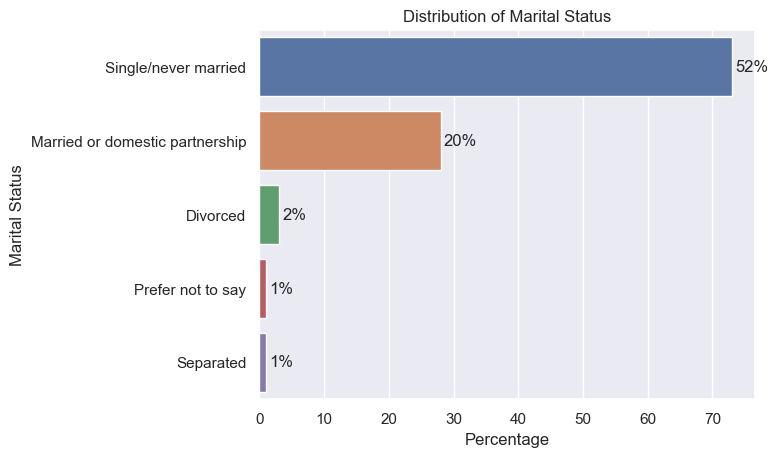

In [11]:
#Marital Status of the respondents
sns.set(style="darkgrid")

# Calculate the total count of each marital status
total_count = len(quatt_df)

marital_counts = quatt_df['Marital Status'].value_counts()

# Sort the marital status categories based on the percentage values in descending order
sorted_marital_counts = marital_counts.sort_values(ascending=False)
sorted_percentage_values = [(count / total_count) * 100 for count in sorted_marital_counts]

# Plot the countplot
ax = sns.countplot(y='Marital Status', data=quatt_df, order=sorted_marital_counts.index)

# Add percentage labels on top of each bar
for i, p in enumerate(ax.patches):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()    
    ax.annotate(f'{round(sorted_percentage_values[i])}%', (x + width + 0.5, y + height / 2), va='center')

# Set plot title and labels
plt.title('Distribution of Marital Status')
plt.ylabel('Marital Status')
plt.xlabel('Percentage')
plt.show()

### 2.5 <span style='color:#F76241'>|</span> Household Composition Distribution

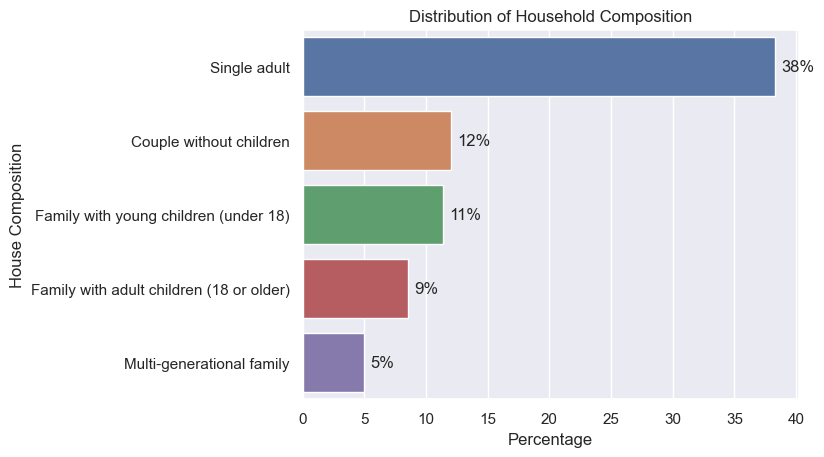

In [12]:
#Household composition of Quatt survey respondents
sns.set(style="darkgrid")

# Calculate the total count of each household composition
total_count = len(quatt_df)
household_counts = quatt_df['House Composition'].value_counts()

# Calculate the percentage values
percentage_values = [(count / total_count) * 100 for count in household_counts]

# Create a DataFrame to hold household composition and corresponding percentage values
composition_df = pd.DataFrame({'House Composition': household_counts.index, 'Percentage': percentage_values})

# Sort the DataFrame by percentage values in descending order
sorted_composition_df = composition_df.sort_values(by='Percentage', ascending=False)

# Plot the countplot with sorted percentage values
ax = sns.barplot(x='Percentage', y='House Composition', data=sorted_composition_df)

# Add percentage labels on top of each bar
for p, percentage in zip(ax.patches, sorted_composition_df['Percentage']):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()    
    ax.annotate(f'{round(percentage)}%', (x + width + 0.5, y + height / 2), va='center')

# Set plot title and labels
plt.title('Distribution of Household Composition')
plt.xlabel('Percentage')
plt.ylabel('House Composition')
plt.show()

### 2.6 <span style='color:#F76241'>|</span>Residence Type Distribution

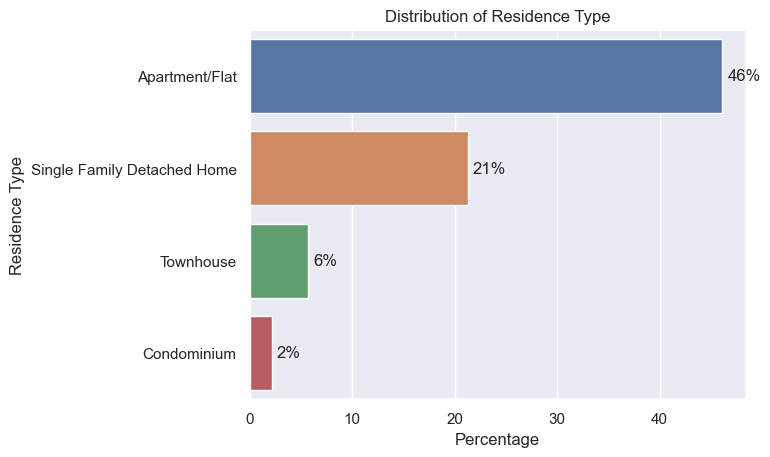

In [13]:
#residence type of Quatt survey respondents
sns.set(style="darkgrid")

# Calculate the total count of each household composition
total_count = len(quatt_df)
household_counts = quatt_df['Residence Type'].value_counts()

# Calculate the percentage values
percentage_values = [(count / total_count) * 100 for count in household_counts]

# Create a DataFrame to hold household composition and corresponding percentage values
residence_df = pd.DataFrame({'Residence Type': household_counts.index, 'Percentage': percentage_values})

# Sort the DataFrame by percentage values in descending order
sorted_residence_df = residence_df.sort_values(by='Percentage', ascending=False)

# Plot the countplot with sorted percentage values
ax = sns.barplot(x='Percentage', y='Residence Type', data=sorted_residence_df)

# Add percentage labels on top of each bar
for p, percentage in zip(ax.patches, sorted_residence_df['Percentage']):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()    
    ax.annotate(f'{round(percentage)}%', (x + width + 0.5, y + height / 2), va='center')

# Set plot title and labels
plt.title('Distribution of Residence Type')
plt.xlabel('Percentage')
plt.ylabel('Residence Type')
plt.show()

### 2.6 <span style='color:#F76241'>|</span> Top 5 Countries by Respondents

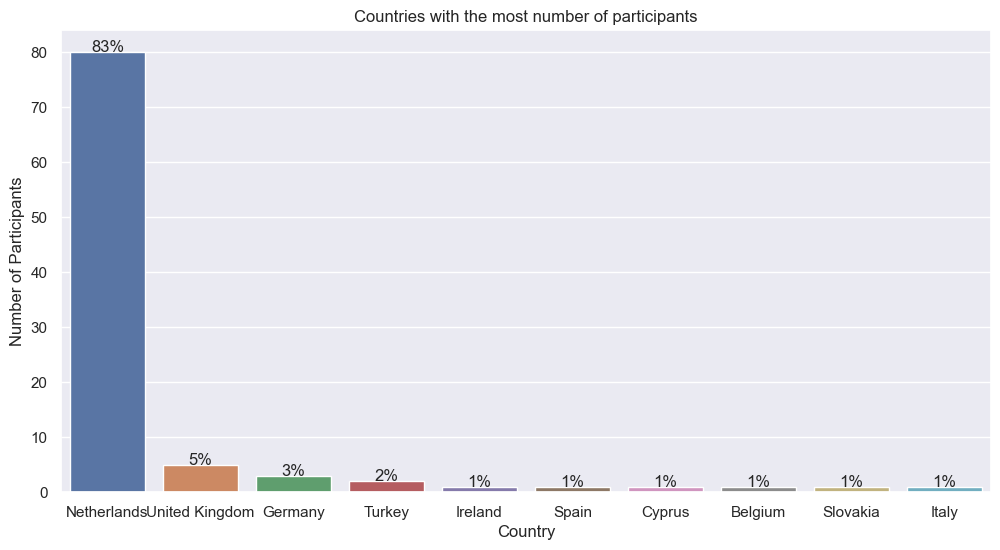

In [14]:
#Top 10 countries with the most number of participants
top_countries = quatt_df['Country'].value_counts().head(10)
plt.figure(figsize=(12,6))
ax = sns.barplot(x=top_countries.index, y=top_countries.values)

# Add percentage labels on top of each bar
total_participants = top_countries.sum()
for p, country in zip(ax.patches, top_countries.index):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()    
    percentage = (height / total_participants) * 100
    ax.annotate(f'{round(percentage)}%', (x + width / 2, y + height), ha='center')

plt.title('Countries with the most number of participants')
plt.xlabel('Country')
plt.ylabel('Number of Participants')
plt.show()


## <b>3 <span style='color:#F76241'>|</span> Hypothesis Testing </b>

### 3.1 <span style='color:#F76241'>|</span> Hypothesis 1: Higher educational levels will positively impact awareness of AI heat pumps in European households.

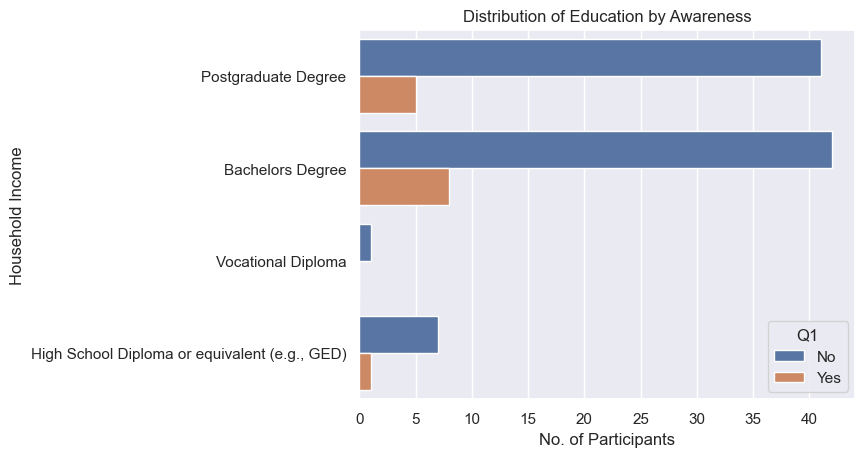

In [15]:
#Visually comparing the awareness of the participants by their education level
sns.set(style="darkgrid")

# Calculate the total count of each partcipant education level
total_count = len(quatt_df)  # get the total number of participants
income_counts = quatt_df['Education'].value_counts() #count the number of each education level

# Plot the countplot with hue
ax = sns.countplot(y='Education', hue='Q1', data=quatt_df)

# Add percentage labels on top of each bar for each hue category
for i, p in enumerate(ax.patches):# Calculate the total count of each partcipant education level
    width = p.get_width()   # get bar length
    height = p.get_height() # get bar height
    x, y = p.get_xy()       # get bar left and top corners

# Set plot title and labels
plt.title('Distribution of Education by Awareness')
plt.ylabel('Household Income')
plt.xlabel('No. of Participants')

# Show the plot
plt.show()

The above graph shows that the respondents with higher education levels are less aware of AI heat pumps than those with lower education levels. This is opposite with the hypothesis that higher education levels will positively impact awareness of AI heat pumps in European households. However, the association is not statistically significant. in the next section, we will test the hypothesis using a chi-square test.

### 3.1.1 <span style='color:#F76241'>|</span> Chi-Square Test - Hypothesis 1

In [16]:
#Test of Association between Education and Awareness
from scipy.stats import chi2_contingency

# Perform the chi-square test
cross_tab = pd.crosstab(quatt_df['Education'], quatt_df['Q1']) # Contingency table
chi2, p_value, _, _ = chi2_contingency(cross_tab) # Chi-square test of independence

# Print the p-value
print("p-value is: " + str(p_value))
# Check for statistical significance
if p_value < 0.05:
    print("There is a significant association between Education and Awareness.")
else:
    print("There is no significant association between Education and Awareness.")

p-value is: 0.8713242205488706
There is no significant association between Education and Awareness.


In [17]:
#New dataframe to hold the education level and awareness category
education_awareness_df = quatt_df[['Education', 'Q1']]

# delete the rows with missing values
education_awareness_df = education_awareness_df.dropna()
education_awareness_df.head()

,Education,Q1
0,Postgraduate Degree,No
1,Bachelors Degree,No
2,Bachelors Degree,No
3,Bachelors Degree,Yes
4,Postgraduate Degree,No


In [18]:
#map the education level to a numerical value
#education_awareness_df['Education'] = education_awareness_df['Education'].map({'High School Diploma or equivalent (e.g., GED)': 1, 'Vocational Diploma': 2, 'Associate Degree': 3, 'Bachelors Degree': 4, 'Postgraduate Degree': 5})
#map the awareness category to a numerical value
education_awareness_df['Q1'] = education_awareness_df['Q1'].map({'Yes': 1, 'No': 0})
#dummy code the awareness column
education_awareness_df = pd.get_dummies(education_awareness_df, columns=['Education'], prefix='', prefix_sep='')

In [19]:
#display the first 5 rows of the new dataframe
education_awareness_df.head()

,Q1,Bachelors Degree,"High School Diploma or equivalent (e.g., GED)",Postgraduate Degree,Vocational Diploma
0,0,0,0,1,0
1,0,1,0,0,0
2,0,1,0,0,0
3,1,1,0,0,0
4,0,0,0,1,0


In [20]:
#Checking for multicollinearity using the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Get the features for the model
features = education_awareness_df.drop('Q1', axis=1)

# Calculate the VIF for each feature
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
vif["Features"] = features.columns

# sort the values
vif.sort_values(by='VIF', ascending=False)
#view the VIF values
vif

,VIF,Features
0,1.0,Bachelors Degree
1,1.0,"High School Diploma or equivalent (e.g., GED)"
2,1.0,Postgraduate Degree
3,1.0,Vocational Diploma


### 3.1.2 <span style='color:#F76241'>|</span> Logistic Regression

In [21]:
#####Perform a logistic regression analysis###############
##########################################################
from sklearn.linear_model import LogisticRegression

feature_cols_edu = ['Postgraduate Degree', 'Bachelors Degree', 'Vocational Diploma', 'High School Diploma or equivalent (e.g., GED)']
x = education_awareness_df[feature_cols_edu]
y = education_awareness_df.Q1

#logistic regression model
logreg = LogisticRegression()
clf = logreg.fit(x,y)
print("Coefficients = ", clf.coef_)
print("Intercept = ", clf.intercept_)
print("Accuracy = ", clf.score(x,y))

Coefficients =  [[-0.13218856  0.24714701 -0.113448   -0.00151771]]
Intercept =  [-1.94262776]
Accuracy =  0.8666666666666667


Assuming y = b0 + b1x1 + b2x2 + b3x3 + b4x4
    
Where y = Awareness of AI heat pumps in European households <br>
    x1 = Postgraduate Degree<br>
    x2 = Bachelors Degree<br>
    x3 = Vocational Diploma<br>
    x4 = High School Diploma or equivalent (e.g., GED)<br>

y = -1.94262776 - 0.13218856x1 + 0.24714701x2 - 0.113448x3 - 0.00151771x4 <br>
From the above it is evident that the coefficient for Postgraduate Degree is negative, which shows that even the higher the level of education still had low awareness of AI heat pumps in European households. This is contrary to the hypothesis, and therefore we reject the null hypothesis. What this tells us in essence is that Education level does not have a significant impact on the awareness of AI heat pumps in European households.

### 3.1.3 <span style='color:#F76241'>|</span> Checking for Normality of Residuals
When checking for normality before logistic regression, you focus on the residuals of the model, which are the differences between the observed outcomes and the predicted probabilities. The residuals should be normally distributed. However,  In logistic regression, residuals do not exhibit the same characteristics as in linear regression due to the nature of probabilities.

Instead, we used a different approach to visualize the fit of our logistic regression model, such as a calibration plot. A calibration plot shows the relationship between the predicted probabilities and the observed probabilities. If the model is well-calibrated, the predicted probabilities should be close to the observed probabilities. In other words, the model is well-calibrated if the proportion of observed outcomes is similar to the predicted probabilities.

In [22]:
# Predicted probabilities
predicted_probs = clf.predict_proba(x)[:, 1]  # Probability of class '1'

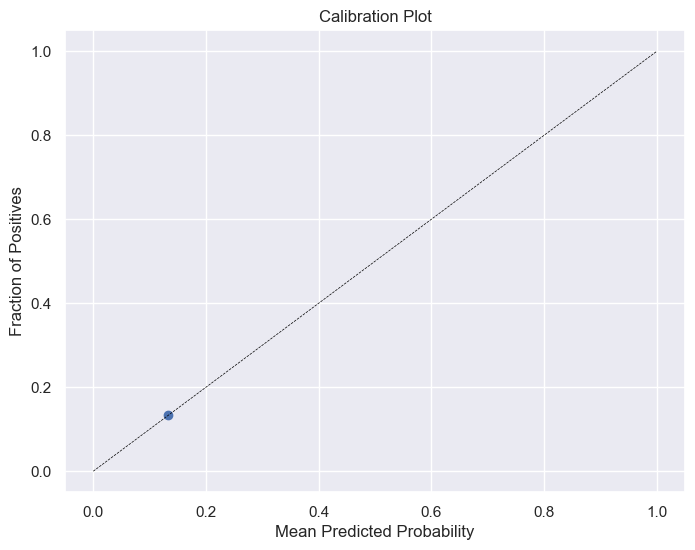

In [23]:
from sklearn.calibration import calibration_curve

# Calibration plot
prob_true, prob_pred = calibration_curve(y, predicted_probs, n_bins=10)

plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', linewidth=0.5)
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Plot')
plt.show()

The plot helps visualize how well the predicted probabilities match the actual observed outcomes. The closer the points are to the diagonal reference line, the better the model's fit. As seen above, the model is well calibrated.

### 3.2 <span style='color:#F76241'>|</span> Hypothesis 2: Higher income brackets will positively impact awareness of AI heat pumps in European households.

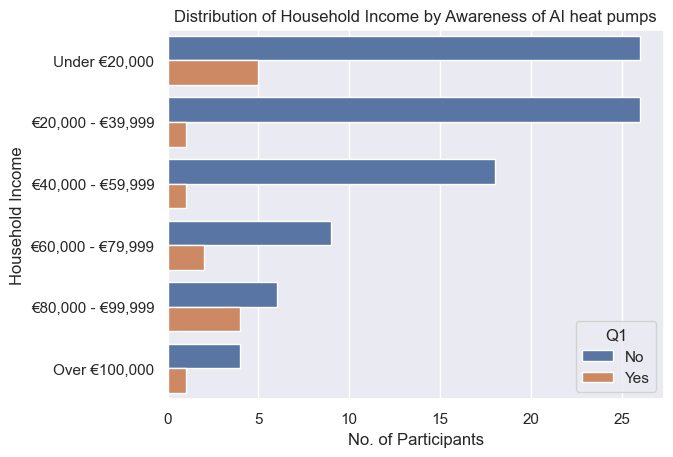

In [24]:
# Distribution of Household Income by the Awareness of AI heat pumps
sns.set(style="darkgrid")

# Calculate the total count of each household income
total_count = len(quatt_df)
income_counts = quatt_df['Household Income'].value_counts()

# Sort the income counts in descending order
sorted_income_counts = income_counts.sort_values(ascending=False)

# Plot the countplot with hue, using the sorted income counts
ax = sns.countplot(y='Household Income', hue='Q1', data=quatt_df, order=sorted_income_counts.index)

# Set plot title and labels
plt.title('Distribution of Household Income by Awareness of AI heat pumps')
plt.ylabel('Household Income')
plt.xlabel('No. of Participants')
plt.show()

### 3.2.1 <span style='color:#F76241'>|</span> Chi-Square Test - Hypothesis 2

In [25]:
#Test of Association between Household Income and Awareness
from scipy.stats import chi2_contingency

# Perform the chi-square test
cross_tab = pd.crosstab(quatt_df['Household Income'], quatt_df['Q1']) # Contingency table - Note that Q1 represents Awareness
chi2, p_value, _, _ = chi2_contingency(cross_tab)

# Print the p-value
print("p-value is: " + str(p_value))
# Check for statistical significance
if p_value < 0.05:
    print("There is a significant association between Household Income and Awareness.")
else:
    print("There is no significant association between Household Income and Awareness.")

p-value is: 0.07960213463475262
There is no significant association between Household Income and Awareness.


In [26]:
#New dataframe to hold the household income and awareness category to perform a logistic regression analysis
income_awareness_df = quatt_df[['Household Income', 'Q1']]
# delete the rows with missing values
income_awareness_df = income_awareness_df.dropna()
#Map the awareness category to a numerical value
income_awareness_df['Q1'] = income_awareness_df['Q1'].map({'Yes': 1, 'No': 0})
#dummy code the household income column
income_awareness_df = pd.get_dummies(income_awareness_df, columns=['Household Income'], prefix='', prefix_sep='')
income_awareness_df.head()

,Q1,"Over €100,000","Under €20,000","€20,000 - €39,999","€40,000 - €59,999","€60,000 - €79,999","€80,000 - €99,999"
0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0
3,1,1,0,0,0,0,0
4,0,0,0,0,1,0,0


### 3.2.2 <span style='color:#F76241'>|</span> Logistic Regression - Hypothesis 2

Coefficients =  [[ 0.11527731 -0.82977025 -0.59689816  0.17606933  0.96228696  0.17302214]]
Intercept =  [-1.79168579]
Accuracy =  0.8640776699029126


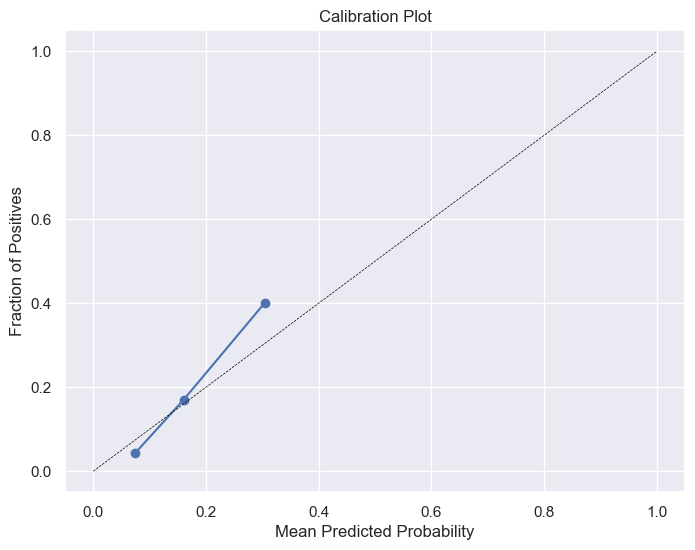

In [27]:
#defining the feature columns and the target column
feature_cols_income = ['Under €20,000', '€20,000 - €39,999', '€40,000 - €59,999', '€60,000 - €79,999', '€80,000 - €99,999', 'Over €100,000']
x = income_awareness_df[feature_cols_income]
y = income_awareness_df.Q1

#logistic regression model
logreg = LogisticRegression()
clf = logreg.fit(x,y)
print("Coefficients = ", clf.coef_)
print("Intercept = ", clf.intercept_)
print("Accuracy = ", clf.score(x,y))

# Predicted probabilities
predicted_probs = clf.predict_proba(x)[:, 1]  # Probability of class '1'

# Checking the Calibration plot
prob_true, prob_pred = calibration_curve(y, predicted_probs, n_bins=10)

plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', linewidth=0.5)
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Plot')
plt.show()

Assuming y = b0 + b1x1 + b2x2 + b3x3 + b4x4 + b5x5 + b6x6
    
Where y = Awareness of AI heat pumps in European households <br>
    x1 = Under €20,000<br>
    x2 = €20,000 - €39,999<br>
    x3 = €40,000 - €59,999<br>
    x4 = €60,000 - €79,999<br>
    x5 = €80,000 - €99,999<br>
    x6 = Over €100,000<br>

y = -1.79168579 + 0.11527731x1 - 0.82977025x2 - 0.59689816x3 - 0.17606933x4 +  0.96228696x5 + 0.17302214x6<br>
From the above it is evident that the coefficient for x1(Under €20,000) is positive, which means that the low household income still positively impacts the awareness of AI heat pumps in European households. This is contrary to the hypothesis, and therefore we reject the null hypothesis. <br>
What this tells us in essence is that Higher household income are almost as aware of AI heatpumps as low-income households. We can also see that model fit is good as the points are close to the diagonal reference line.
In the next line of code, we will check which of the demographic groups are mor likely to adopt AI heat pumps.

### 3.3 <span style='color:#F76241'>|</span> Hypothesis 3: Demographic factors have a positive impact on the likelihood to adopt AI heat pumps in European households.
### Checking the Impact of Demographics on the Adoption of AI heat pumps

In [28]:
#create a new dataframe to hold the demographic variables and the AI based heat pump adoption likelihood
demographic_df = quatt_df[['Age', 'Gender', 'Education', 'Marital Status', 'Residence Type', 'House Composition', 'Household Income', 'green_policy_score', 'Q7']]

#map the adoption likelihood(target variable) to a numerical value
demographic_df['Q7'] = demographic_df['Q7'].map({'Extremely unlikely': 1, 'Somewhat unlikely': 2, 'Neither likely nor unlikely': 3, 'Somewhat likely': 4, 'Extremely likely': 5})
demographic_df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_25168\2257405049.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographic_df['Q7'] = demographic_df['Q7'].map({'Extremely unlikely': 1, 'Somewhat unlikely': 2, 'Neither likely nor unlikely': 3, 'Somewhat likely': 4, 'Extremely likely': 5})


,Age,Gender,Education,Marital Status,Residence Type,House Composition,Household Income,green_policy_score,Q7
0,35 - 44,Male,Postgraduate Degree,Married or domestic partnership,Single Family Detached Home,Family with young children (under 18),"Over €100,000",68.8,1.0
1,below 25,Female,Bachelors Degree,Single/never married,Single Family Detached Home,Family with adult children (18 or older),"€80,000 - €99,999",68.8,3.0
2,25 - 34,Female,Bachelors Degree,Single/never married,Single Family Detached Home,Multi-generational family,"€40,000 - €59,999",68.8,1.0
3,55 - 65,Male,Bachelors Degree,Married or domestic partnership,Single Family Detached Home,Family with adult children (18 or older),"Over €100,000",68.8,1.0
4,NaN,NaN,Postgraduate Degree,Single/never married,Single Family Detached Home,Couple without children,"€40,000 - €59,999",68.8,5.0


In [29]:
#Checking the Null values in the dataset
demographic_df.isnull().sum()

Age                   37
Gender                35
Education             35
Marital Status        35
Residence Type        35
House Composition     35
Household Income      37
green_policy_score    41
Q7                    40
dtype: int64

In [30]:
#dropping the rows with missing values
demographic_df = demographic_df.dropna()

#checking the shape of the dataframe
demographic_df.shape

(89, 9)

### 3.3.1 <span style='color:#F76241'>|</span> Correlation Analysis

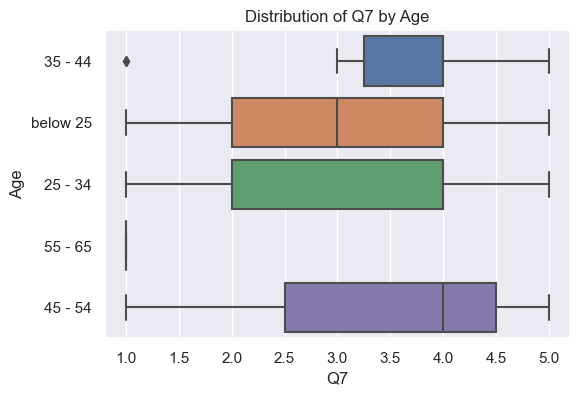

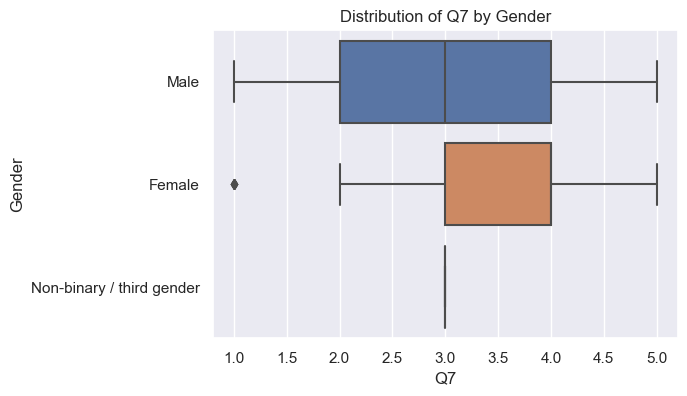

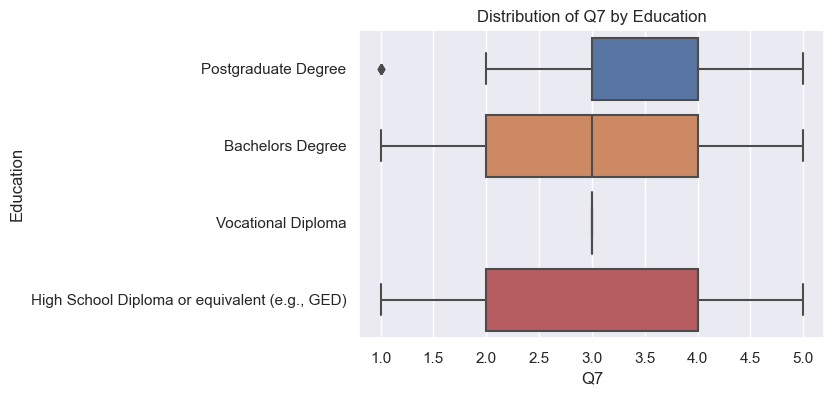

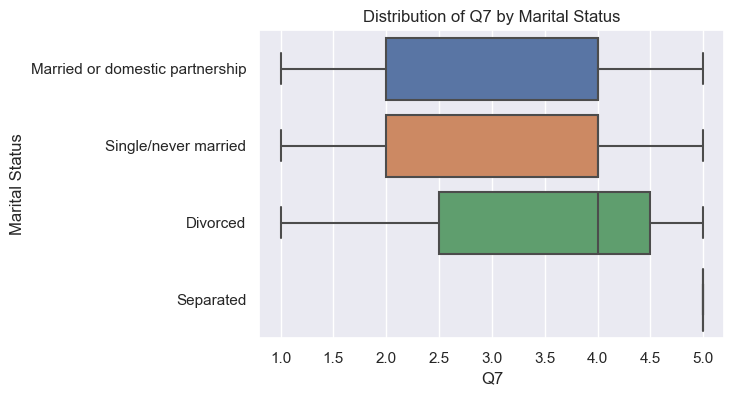

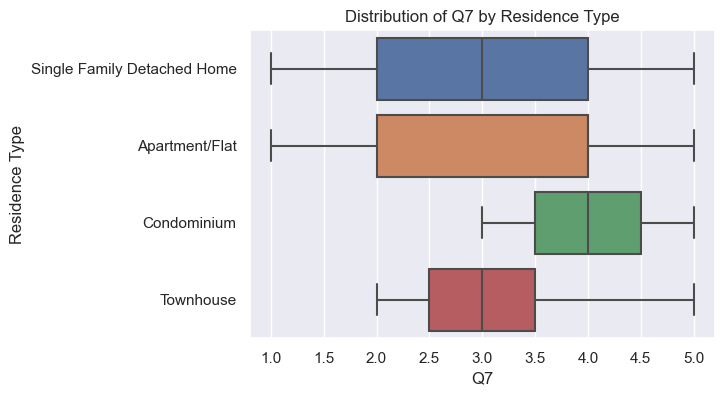

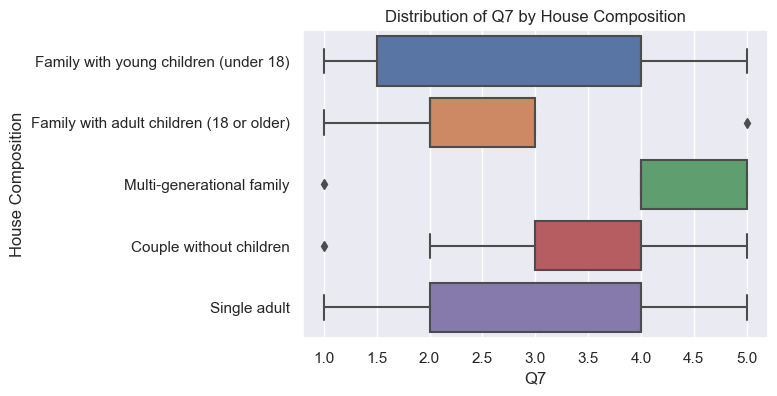

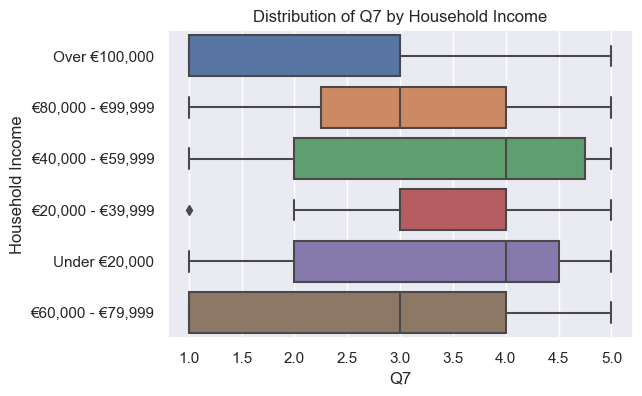

In [31]:
# Visualsing the of the demographic categorical variables
# Create box plots for each categorical variable against the ordinal variable
categorical_vars = ['Age', 'Gender', 'Education', 'Marital Status', 'Residence Type', 'House Composition', 'Household Income']
for var in categorical_vars:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Q7', y=var, data=demographic_df)
    plt.title(f'Distribution of Q7 by {var}')
    plt.show()

From visual inspection of the boxplots above, Its evident that the adoption likelihood is not normally distributed across the different demographic groups. This means that we cannot use a parametric test to check for the significance of their association. We will therefore use the non-parametric method to check for the significance of their association. In the next line of code, we will check the significance of the difference in means across the different demographic groups.

When dealing with a nominal variable (categorical with no inherent order) and an ordinal variable (categorical with an ordered relationship), calculating a traditional correlation coefficient might not be appropriate or meaningful. To check the signifcance between the nominal and ordinal (target) variables, we will employ the use of To check the signifcance between the nominal and ordinal (target) variables, we will employ the use of a chi-squared test for independence to assess whether there is a statistically significant association between the nominal and ordinal variables. The chi-squared test can help you understand if the distribution of the ordinal variable differs significantly across different categories of the nominal variable.

In [32]:
#Correlation matrix
nominal_features = ['Marital Status', 'Residence Type',	'House Composition', 'Q7']

# perfroming a chi-square test of independence for each pair of nominal variables
for i in range(len(nominal_features)):
    for j in range(i+1, len(nominal_features)):
        print(f'Chi-square test of independence between {nominal_features[i]} and {nominal_features[j]}')
        cross_tab = pd.crosstab(demographic_df[nominal_features[i]], demographic_df[nominal_features[j]])
        chi2, p_value, _, _ = chi2_contingency(cross_tab)
        print("p-value is: " + str(p_value))
        if p_value < 0.05:
            print("There is a significant association between the two variables.")
        else:
            print("There is no significant association between the two variables.")
        print('-----------------------------------------------------')

Chi-square test of independence between Marital Status and Residence Type
p-value is: 0.49914310300077647
There is no significant association between the two variables.
-----------------------------------------------------
Chi-square test of independence between Marital Status and House Composition
p-value is: 0.0001470369197706921
There is a significant association between the two variables.
-----------------------------------------------------
Chi-square test of independence between Marital Status and Q7
p-value is: 0.6990131930517751
There is no significant association between the two variables.
-----------------------------------------------------
Chi-square test of independence between Residence Type and House Composition
p-value is: 0.00016984430059823965
There is a significant association between the two variables.
-----------------------------------------------------
Chi-square test of independence between Residence Type and Q7
p-value is: 0.17441357216313078
There is no signif

We will drop the House composition from the dataframe as it is not a significant predictor of the adoption of AI heat pumps. This is because it is asssociated with both marital status and House Composition. Therefore, it may have the same effect on the target variable. It is also evident that there is no significant association between any of the nominal variables and our tartget variable(Q7).<br>
In preparation for our analysis, we will encode the categorical variables into numerical variables. We employ both the ordinal encoding and dummy coding methods to encode the categorical variables.

### 3.3.2 <span style='color:#F76241'>|</span> Feature engineering

In [33]:
#dropping the household composition column
demographic_df = demographic_df.drop(columns=['House Composition'])

#perform ordinal encoding on Age, Education, and Household Income
#demographic_df['Age'] = demographic_df['Age'].map({'below 25': 1, '25 - 34': 2, '35 - 44': 3, '45 - 54': 4, '55 - 65': 5})
#demographic_df['Education'] = demographic_df['Education'].map({'High School Diploma or equivalent (e.g., GED)': 1, 'Vocational Diploma': 2, 'Associate Degree': 3, 'Bachelors Degree': 4, 'Postgraduate Degree': 5})
#demographic_df['Household Income'] = demographic_df['Household Income'].map({'Under €20,000': 1, '€20,000 - €39,999': 2, '€40,000 - €59,999': 3, '€60,000 - €79,999': 4, '€80,000 - €99,999': 5, 'Over €100,000': 6})

#dummy code the categorical variables
nominal_features = ['Age', 'Education',	'Household Income',	'Gender', 'Marital Status', 'Residence Type']
demographic_df = pd.get_dummies(demographic_df, columns=nominal_features, prefix='', prefix_sep='')

#visualize updated dataframe
demographic_df.head()

,green_policy_score,Q7,25 - 34,35 - 44,45 - 54,55 - 65,below 25,Bachelors Degree,"High School Diploma or equivalent (e.g., GED)",Postgraduate Degree,...,Male,Non-binary / third gender,Divorced,Married or domestic partnership,Separated,Single/never married,Apartment/Flat,Condominium,Single Family Detached Home,Townhouse
0,68.8,1.0,0,1,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1,68.8,3.0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,68.8,1.0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,68.8,1.0,0,0,0,1,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
5,68.8,5.0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0


In [34]:
#Performing an ordinal to ordinal correlation analysis
ordinal_vars = ['25 - 34',	'35 - 44',	'45 - 54',	'55 - 65',	'below 25',	'Bachelors Degree',	'High School Diploma or equivalent (e.g., GED)', 'Postgraduate Degree', 'Under €20,000', '€20,000 - €39,999', '€40,000 - €59,999', '€60,000 - €79,999', '€80,000 - €99,999', 'Over €100,000', 'Female', 'Male', 'green_policy_score', 'Non-binary / third gender', 'Divorced', 'Married or domestic partnership', 'Separated', 'Single/never married', 'Apartment/Flat', 'Condominium',	'Single Family Detached Home', 'Townhouse', 'Q7']
demographic_df[ordinal_vars].corr(method='spearman')

,25 - 34,35 - 44,45 - 54,55 - 65,below 25,Bachelors Degree,"High School Diploma or equivalent (e.g., GED)",Postgraduate Degree,"Under €20,000","€20,000 - €39,999",...,Non-binary / third gender,Divorced,Married or domestic partnership,Separated,Single/never married,Apartment/Flat,Condominium,Single Family Detached Home,Townhouse,Q7
25 - 34,1.000000,-0.511756,-0.268651,-0.153333,-0.647599,0.032914,-0.242150,0.130835,-0.114843,0.087120,...,-0.153333,-0.135818,-0.063731,0.074111,0.096872,0.078304,-0.135818,-0.045549,0.025016,0.014951
35 - 44,-0.511756,1.000000,-0.066450,-0.037927,-0.160183,-0.193789,-0.103951,0.187726,0.074784,-0.106309,...,0.299621,0.130686,0.184662,-0.037927,-0.218663,0.067926,-0.066450,0.015121,-0.103951,0.060122
45 - 54,-0.268651,-0.066450,1.000000,-0.019910,-0.084089,-0.176558,-0.054570,0.211477,0.012173,0.048601,...,-0.019910,0.310078,0.167084,-0.019910,-0.275675,-0.104540,0.310078,0.021790,-0.054570,0.022544
55 - 65,-0.153333,-0.037927,-0.019910,1.000000,-0.047994,0.112767,-0.031146,-0.094147,-0.070347,-0.057392,...,-0.011364,-0.019910,0.175432,-0.011364,-0.157342,-0.132410,-0.019910,0.170561,-0.031146,-0.165128
below 25,-0.647599,-0.160183,-0.084089,-0.047994,1.000000,0.175646,0.425953,-0.397628,0.094635,-0.026663,...,-0.047994,-0.084089,-0.205942,-0.047994,0.240393,-0.067660,0.082221,-0.014257,0.091455,-0.033814
Bachelors Degree,0.032914,-0.193789,-0.176558,0.112767,0.175646,1.000000,-0.276196,-0.834878,0.061612,-0.131476,...,-0.100771,-0.176558,-0.016526,0.112767,0.058817,-0.022262,-0.051846,0.060207,-0.025365,-0.184286
"High School Diploma or equivalent (e.g., GED)",-0.242150,-0.103951,-0.054570,-0.031146,0.425953,-0.276196,1.000000,-0.258041,0.170366,0.042696,...,-0.031146,-0.054570,-0.177538,-0.031146,0.197950,-0.021122,0.176703,-0.089739,0.069686,-0.028549
Postgraduate Degree,0.130835,0.187726,0.211477,-0.094147,-0.397628,-0.834878,-0.258041,1.000000,-0.139478,0.067056,...,-0.094147,0.211477,0.126711,-0.094147,-0.181918,0.061987,-0.039476,-0.048122,-0.005671,0.210472
"Under €20,000",-0.114843,0.074784,0.012173,-0.070347,0.094635,0.061612,0.170366,-0.139478,1.000000,-0.355285,...,-0.070347,0.012173,-0.070545,-0.070347,0.078656,0.181029,0.147599,-0.140537,-0.192809,0.112106
"€20,000 - €39,999",0.087120,-0.106309,0.048601,-0.057392,-0.026663,-0.131476,0.042696,0.067056,-0.355285,1.000000,...,0.198001,-0.100555,-0.084512,0.198001,0.074906,0.102787,0.048601,-0.216699,0.142695,0.098560


### 3.3.3 <span style='color:#F76241'>|</span> Checking for Multicollinearity (VIF)

Because we are using dummy variables, we will drop one of the dummy variables to avoid the dummy variable trap. We will drop the first dummy variable for each of the categorical variables. We will also drop the target variable from the dataframe.

In [35]:
#### before checking for collinearity using Vif, is it necessary to ensure the data is in the same scale. 
### therefore, we will perform a min-max scaling on the data
from sklearn.preprocessing import MinMaxScaler
dummy_features = ['25 - 34', '35 - 44',	'45 - 54',	'55 - 65',	'below 25',	'Bachelors Degree',	'High School Diploma or equivalent (e.g., GED)', 'Postgraduate Degree', 'Under €20,000', '€20,000 - €39,999', '€40,000 - €59,999', '€60,000 - €79,999', '€80,000 - €99,999', 'Over €100,000', 'Female', 'Male', 'green_policy_score', 'Non-binary / third gender', 'Divorced', 'Married or domestic partnership', 'Separated', 'Single/never married', 'Apartment/Flat', 'Condominium',	'Single Family Detached Home', 'Townhouse']
# Create a scaler object
scaler = MinMaxScaler()
# Fit the scaler to the data
scaler.fit(demographic_df[dummy_features])
# Transform and replace the original data with scaled data
demographic_df[dummy_features] = scaler.transform(demographic_df[dummy_features])

## Computing VIF ##
###################
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Checking how the VIF values behave
considered_features = ['25 - 34', '35 - 44', '45 - 54',	'below 25',	'Bachelors Degree',	'High School Diploma or equivalent (e.g., GED)', 'Postgraduate Degree', 'Under €20,000', '€20,000 - €39,999', '€40,000 - €59,999', '€60,000 - €79,999', '€80,000 - €99,999', 'Female', 'Male', 'green_policy_score',  'Divorced', 'Married or domestic partnership', 'Single/never married', 'Apartment/Flat', 'Single Family Detached Home', 'Townhouse']
# creating a dataframe for saving the VIF values
df_vif = pd.DataFrame()
df_vif["feature"] = considered_features
# calculating VIF for each feature
vif = [variance_inflation_factor(demographic_df[considered_features].values, i) for i in range(len(considered_features))]
df_vif['vif'] = vif

df_vif.sort_values(by = 'vif')

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered 

,feature,vif
20,Townhouse,3.856952
15,Divorced,3.935630
10,"€60,000 - €79,999",4.064587
11,"€80,000 - €99,999",4.166338
2,45 - 54,4.643209
9,"€40,000 - €59,999",7.059711
8,"€20,000 - €39,999",7.626051
19,Single Family Detached Home,9.998780
7,"Under €20,000",10.441813
1,35 - 44,11.376462


We reiterate the VIF test to check for multicollinearity. When the VIF test shows that there is no more multicollinearity in the dataset, We will therefore proceed with the analysis.

In [36]:
# Checking how the VIF values become without green policy score, 25-34, amd Single/never married 'High School Diploma or equivalent (e.g., GED)'
considered_features_gps = ['35 - 44', '45 - 54', 'below 25', 'Bachelors Degree', 'Postgraduate Degree', 'Under €20,000', '€20,000 - €39,999', '€40,000 - €59,999', '€60,000 - €79,999', '€80,000 - €99,999', 'Female', 'Male', 'Divorced', 'Married or domestic partnership', 'Apartment/Flat', 'Single Family Detached Home', 'Townhouse']
# creating a dataframe for saving the VIF values
df_vif = pd.DataFrame()
df_vif["feature"] = considered_features_gps
# calculating VIF for each feature
vif = [variance_inflation_factor(demographic_df[considered_features_gps].values, i) for i in range(len(considered_features_gps))]
df_vif['vif'] = vif

df_vif.sort_values(by = 'vif')

,feature,vif
12,Divorced,1.333093
0,35 - 44,1.466350
1,45 - 54,1.538845
2,below 25,1.822181
13,Married or domestic partnership,2.066032
8,"€60,000 - €79,999",3.103034
9,"€80,000 - €99,999",3.239864
16,Townhouse,3.252847
6,"€20,000 - €39,999",5.201978
7,"€40,000 - €59,999",5.278961


In [37]:
# Checking how the VIF values become without Male
considered_features_male = ['35 - 44', '45 - 54', 'below 25', 'Bachelors Degree', 'Postgraduate Degree', 'Under €20,000', '€20,000 - €39,999', '€40,000 - €59,999', '€60,000 - €79,999', '€80,000 - €99,999', 'Female', 'Divorced', 'Married or domestic partnership', 'Apartment/Flat', 'Single Family Detached Home', 'Townhouse']
# creating a dataframe for saving the VIF values
df_vif = pd.DataFrame()
df_vif["feature"] = considered_features_male
# calculating VIF for each feature
vif = [variance_inflation_factor(demographic_df[considered_features_male].values, i) for i in range(len(considered_features_male))]
df_vif['vif'] = vif

df_vif.sort_values(by = 'vif')

,feature,vif
11,Divorced,1.332932
0,35 - 44,1.427486
1,45 - 54,1.529055
2,below 25,1.625164
12,Married or domestic partnership,1.993592
15,Townhouse,2.362797
10,Female,2.463233
8,"€60,000 - €79,999",2.639472
9,"€80,000 - €99,999",2.718412
6,"€20,000 - €39,999",4.297050


In [38]:
# Checking how the VIF values become without Apartment/Flat
considered_features_edu = ['35 - 44', '45 - 54', 'below 25', 'Bachelors Degree', 'Postgraduate Degree', 'Under €20,000', '€20,000 - €39,999', '€40,000 - €59,999', '€60,000 - €79,999', '€80,000 - €99,999', 'Female', 'Divorced', 'Married or domestic partnership', 'Single Family Detached Home', 'Townhouse']
# creating a dataframe for saving the VIF values
df_vif = pd.DataFrame()
df_vif["feature"] = considered_features_edu
# calculating VIF for each feature
vif = [variance_inflation_factor(demographic_df[considered_features_edu].values, i) for i in range(len(considered_features_edu))]
df_vif['vif'] = vif

df_vif.sort_values(by = 'vif')

,feature,vif
14,Townhouse,1.272067
11,Divorced,1.323547
0,35 - 44,1.403219
1,45 - 54,1.409105
2,below 25,1.565129
13,Single Family Detached Home,1.652637
12,Married or domestic partnership,1.990160
8,"€60,000 - €79,999",1.996367
9,"€80,000 - €99,999",2.132278
10,Female,2.462336


In [39]:
# Checking how the VIF values become without 'Postgraduate Degree',
considered_features_single = ['35 - 44', '45 - 54', 'below 25', 'Bachelors Degree',  'Under €20,000', '€20,000 - €39,999', '€40,000 - €59,999', '€60,000 - €79,999', '€80,000 - €99,999', 'Female', 'Divorced', 'Married or domestic partnership', 'Single Family Detached Home', 'Townhouse']
# creating a dataframe for saving the VIF values
df_vif = pd.DataFrame()
df_vif["feature"] = considered_features_single
# calculating VIF for each feature
vif = [variance_inflation_factor(demographic_df[considered_features_single].values, i) for i in range(len(considered_features_single))]
df_vif['vif'] = vif

df_vif.sort_values(by = 'vif')

,feature,vif
13,Townhouse,1.238792
10,Divorced,1.301538
0,35 - 44,1.398556
1,45 - 54,1.404558
2,below 25,1.419613
8,"€80,000 - €99,999",1.451436
7,"€60,000 - €79,999",1.526586
5,"€20,000 - €39,999",1.557288
12,Single Family Detached Home,1.643423
6,"€40,000 - €59,999",1.781599


Finally, all our values are now below the threshold of 5, which means that there is no more multicollinearity in the dataset. We will therefore proceed with the analysis.

### 3.3.4 <span style='color:#F76241'>|</span> Multiple Linear Regression

In this section, we will use a multiple linear regression to see the impact of the selected demographic factors on the adoption of AI heat pumps.

In [40]:
#####Perform a Multiple Linear regression analysis###############
##########################################################

feature_cols_demo = ['35 - 44', '45 - 54', 'below 25', 'Bachelors Degree',  'Under €20,000', '€20,000 - €39,999', '€40,000 - €59,999', '€60,000 - €79,999', '€80,000 - €99,999', 'Female', 'Divorced', 'Married or domestic partnership', 'Single Family Detached Home', 'Townhouse']
x = demographic_df[feature_cols_demo]
y = demographic_df.Q7

# Fit an multiple linear regression model
model = sm.OLS(y, x)  # Use OLS as it supports ordinal regression
result = model.fit()  # Fit the model using pinv method

# Print summary of regression results
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                     Q7   R-squared (uncentered):                   0.852
Model:                            OLS   Adj. R-squared (uncentered):              0.824
Method:                 Least Squares   F-statistic:                              30.83
Date:                Fri, 25 Aug 2023   Prob (F-statistic):                    2.00e-25
Time:                        18:10:54   Log-Likelihood:                         -154.01
No. Observations:                  89   AIC:                                      336.0
Df Residuals:                      75   BIC:                                      370.9
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------

#### RESULTS
Assuming y = b0 + b1x1 + b2x2 + b3x3 + b4x4 + b5x5 + b6x6 + b7x7
    
Where y = Adoption likelihood of AI heat pumps in European households <br>
X1 = 35 - 44
X2 = 45 - 54
X3 = below 25
X4 = Bachelor’s Degree
X5 = Under €20,000
X6 = €20,000 - €39,999
X7 = €40,000 - €59,999
X8 = €60,000 - €79,999
X9 = €80,000 - €99,999
X10 = Female
X11 = Divorced
X12 = Married or domestic partnership
X13 = Single Family Detached Home
X14 = Townhouse

Therefore, the regression model result obtained is:
Y =0.6787X1 + 0.2694 X2 − 0.0365 X3 + 0.0341 X4 + 3.0578 X5 + 3.1174 X6 + 2.6854 X7 + 2.3110 X8 + 2.4080 X9 + 0.5573 X10 + 0.5573 X11 + 0.1308 X12 + 0.2633 X13 + 0.0482 X13 + 0.8029 X14 <br>

Here are the interpretations for each coefficient:

- 35 - 44: For individuals aged 35 - 44, the expected value of Q7 increases by 0.6787, but this change is not statistically significant (p-value = 0.226).

- 45 - 54: For individuals aged 45 - 54, the expected value of Q7 increases by 0.2694, but this change is not statistically significant (p-value = 0.792).

- below 25: For individuals below 25 years old, the expected value of Q7 decreases by 0.0365, and this change is not statistically significant (p-value = 0.937).

- Bachelors Degree: Having a Bachelors Degree is associated with a minor increase of 0.0341 in the expected value of Q7, and this change is not statistically significant (p-value = 0.920).

- Under €20,000: Individuals with an income under €20,000 have an expected Q7 value increase of 3.0578. This change is highly statistically significant (p-value < 0.001), suggesting a significant impact.

- €20,000 - €39,999: Individuals with an income between €20,000 and €39,999 experience an expected Q7 value increase of 3.1174. This change is highly statistically significant (p-value < 0.001).

- €40,000 - €59,999: Individuals with an income between €40,000 and €59,999 have an expected Q7 value increase of 2.6854. This change is highly statistically significant (p-value < 0.001).

- €60,000 - €79,999: Individuals with an income between €60,000 and €79,999 experience an expected Q7 value increase of 2.3110. This change is highly statistically significant (p-value < 0.001).

- €80,000 - €99,999: Individuals with an income between €80,000 and €99,999 have an expected Q7 value increase of 2.4080. This change is highly statistically significant (p-value < 0.001).

- Female: Females have an expected Q7 value increase of 0.5573 compared to males, but this change is not statistically significant (p-value = 0.126).

- Divorced: Being divorced is associated with a minor increase of 0.1308 in the expected value of Q7, but this change is not statistically significant (p-value = 0.894).

- Married or domestic partnership: Being married or in a domestic partnership is linked to a modest increase of 0.2633 in the expected value of Q7, but this change is not statistically significant (p-value = 0.524).

- Single Family Detached Home: Living in a Single Family Detached Home is connected to a slight increase of 0.0482 in the expected value of Q7, but this change is not statistically significant (p-value = 0.900).

- Townhouse: Living in a Townhouse is associated with a more noticeable increase of 0.8029 in the expected value of Q7, but this change is not statistically significant (p-value = 0.203).

In summary, the results suggest that income categories from €20,000 and above significantly impact Q7, with higher incomes associated with higher Q7 values. Other variables, such as age groups, education level, gender, marital status, and residence type, do not appear to have statistically significant effects on Q7. Generally, Its evident that the demographic factors have a positive impact on the likelihood to adopt AI heat pumps in European households. Therefore, we accept the null hypothesis.

#### Model Fit:

- R-squared: 0.852 (Coefficient of determination) - This indicates that around 85.2% of the variability in the dependent variable is explained by the independent variables in the model.<br>
- Adjusted R-squared: 0.824 (R-squared adjusted for the number of independent variables) - This is a more conservative measure of the model's goodness of fit, penalizing for the number of predictors.<br>
- F-statistic: 30.83 - This is the result of an overall significance test of the model. It tests whether at least one independent variable has a non-zero coefficient in the model.<br>
- Prob (F-statistic): 2.00e-25 - This is the p-value associated with the F-statistic. A very small p-value indicates that the model's overall fit is statistically significant.<br>
- The residual plot also shows that the residuals are normally distributed. This means that the model is a good fit for the data.

### 3.3.5 <span style='color:#F76241'>|</span> Checking for Linearity

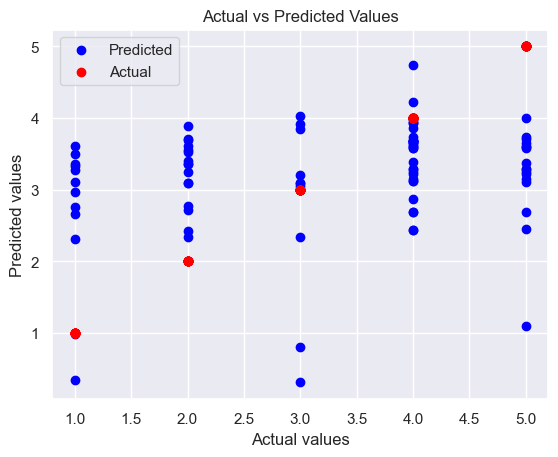

In [41]:
# Create a prediction based on our model and plot it against the actual values
plt.scatter(y, result.fittedvalues, color='blue', label='Predicted')
plt.scatter(y, y, color='red', label='Actual')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

Based on graph above the linearity assumption is met as the points are close to the diagonal reference line.

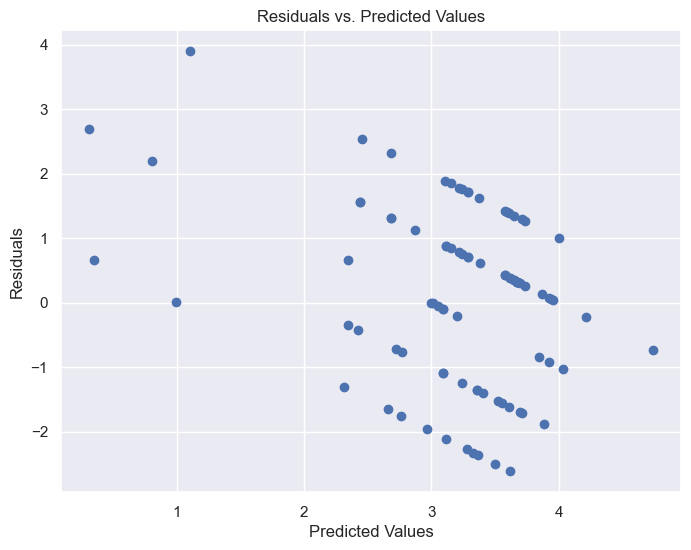

In [42]:
# scatter plot of the predicted values against the residuals
plt.figure(figsize=(8, 6))
plt.scatter(result.predict(), result.resid)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

### 3.3.6 <span style='color:#F76241'>|</span> Checking for Normality of Residuals

C:\Users\User\AppData\Local\Temp\ipykernel_25168\122136093.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(result.resid, fit=norm)


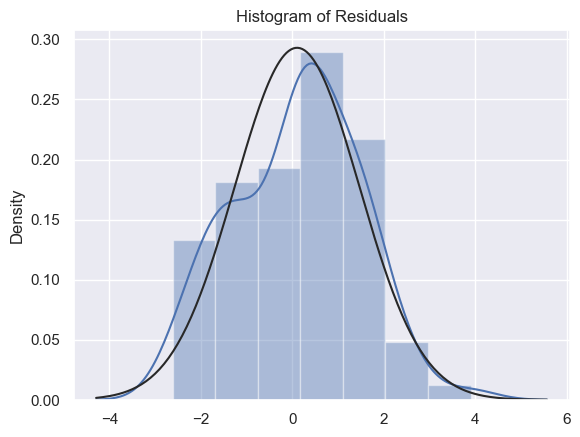

In [43]:
# Importing necessary functions
from scipy.stats import norm

# Plotting the residuals
sns.distplot(result.resid, fit=norm)
plt.title('Histogram of Residuals')
plt.show()

Finally it is fair to conclude that demographic factors generally have a positive impact on the likelihood to adopt AI heat-pumps.

### 3.4 <span style='color:#F76241'>|</span> Hypothesis 4: Cost savings positively impacts adoption likelihood of AI heat pumps than other adoption influencers.

In [44]:
# First we create a new dataframe to hold the adoption influencer variables and the Adoption likelihood
adoption_influencer_df = quatt_df[[ 'Q5', 'Q7']]

#map the adoption likelihood(target variable) to a numerical value
adoption_influencer_df['Q7'] = adoption_influencer_df['Q7'].map({'Extremely unlikely': 1, 'Somewhat unlikely': 2, 'Neither likely nor unlikely': 3, 'Somewhat likely': 4, 'Extremely likely': 5})

#check for association between the adoption influencer variables and the adoption likelihood
#### We will therefore use the chi-squared test to check for the significance of the association ####
#### between the adoption likelihood and adoption influencers ####
cross_tab = pd.crosstab(adoption_influencer_df['Q5'], adoption_influencer_df['Q7'])
chi2, p_value, _, _ = chi2_contingency(cross_tab)
print("p-value is: " + str(p_value))
if p_value < 0.05:
    print("There is a significant association between the two variables.")
else:
    print("There is no significant association between the two variables.")

p-value is: 0.5304803556260804
There is no significant association between the two variables.


C:\Users\User\AppData\Local\Temp\ipykernel_25168\815880590.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adoption_influencer_df['Q7'] = adoption_influencer_df['Q7'].map({'Extremely unlikely': 1, 'Somewhat unlikely': 2, 'Neither likely nor unlikely': 3, 'Somewhat likely': 4, 'Extremely likely': 5})


The chi-square test above shows that there is no significant association between the adoption likelihood and adoption influencers. However, we will still check the impact of the adoption influencers on the adoption likelihood using a multiple linear regression.

In [45]:
### FEATURE ENGINEERING
#dummy code the adoption influencer column
adoption_influencer_df = pd.get_dummies(adoption_influencer_df, columns=['Q5'], prefix='', prefix_sep='')
adoption_influencer_df.head()
#checking for null values
adoption_influencer_df.isnull().sum()

Q7                         40
Comfort and Ease of use     0
Energy Cost savings         0
Energy efficiency           0
Environmental impact        0
dtype: int64

In [46]:
#dropping the rows with missing values
adoption_influencer_df = adoption_influencer_df.dropna()
#checking the shape of the dataframe
adoption_influencer_df.shape
adoption_influencer_df.head()

,Q7,Comfort and Ease of use,Energy Cost savings,Energy efficiency,Environmental impact
0,1.0,0,1,0,0
1,3.0,0,1,0,0
2,1.0,1,0,0,0
3,1.0,0,0,0,1
4,5.0,0,1,0,0


In [47]:
#### Checking for multicollinearity using VIF ####
#################################################

considered_features = ['Comfort and Ease of use', 'Energy Cost savings', 'Energy efficiency', 'Environmental impact']
# creating a dataframe for saving the VIF values
df_vif = pd.DataFrame()
df_vif["feature"] = considered_features
# calculating VIF for each feature
vif = [variance_inflation_factor(adoption_influencer_df[considered_features].values, i) for i in range(len(considered_features))]
df_vif['vif'] = vif

df_vif.sort_values(by = 'vif')

,feature,vif
0,Comfort and Ease of use,1.0
1,Energy Cost savings,1.0
2,Energy efficiency,1.0
3,Environmental impact,1.0


### 3.4.1 <span style='color:#F76241'>|</span> Multiple linear regression analysis - Hypothesis 4

In [48]:
#Perfroming a multiple linear regression analysis

#defining the feature columns and the target column
x = adoption_influencer_df[['Comfort and Ease of use', 'Energy Cost savings', 'Energy efficiency', 'Environmental impact']]
y = adoption_influencer_df.Q7

# Fit a multiple linear regression model
model = sm.OLS(y, x)  # Use OLS as it supports ordinal regression
results = model.fit()  # Fit the model

# Print summary of regression results
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                     Q7   R-squared (uncentered):                   0.878
Model:                            OLS   Adj. R-squared (uncentered):              0.873
Method:                 Least Squares   F-statistic:                              174.2
Date:                Fri, 25 Aug 2023   Prob (F-statistic):                    2.30e-43
Time:                        18:10:55   Log-Likelihood:                         -165.99
No. Observations:                 101   AIC:                                      340.0
Df Residuals:                      97   BIC:                                      350.4
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

From the above result, the regression model equstion can be seen as follows:
 y = b0 +  2.9333x1 + 3.5246x2 + 3.5000x3 +  2.8000x4 

The R-squared value of 0.878 indicates that approximately 87.8% of the variance in the dependent variable (Q7) can be explained by the independent variables included in the model. The adjusted R-squared value of 0.873 adjusts for the number of predictors in the model. In terms of Significance, all predictor variables are statistically significant (p-values < 0.001), suggesting that each variable has a significant impact on the adoption likelihood of AI heat pumps.

However, based on the coefficients, 'Energy Cost Savings' has the highest impact on the adoption likelihood of AI heat pumps, followed by 'Energy efficiency', 'Comfort and Ease of use'. 'Convenience' has the lowest impact on the adoption likelihood of AI heat pumps. Thus, we can conclude that consumers who prioritize cost savings are more likely to adopt AI heat pumps than those who prioritize other factors. We therefore accept the null hypothesis.

### 3.4.2 <span style='color:#F76241'>|</span> Checking for Linearity

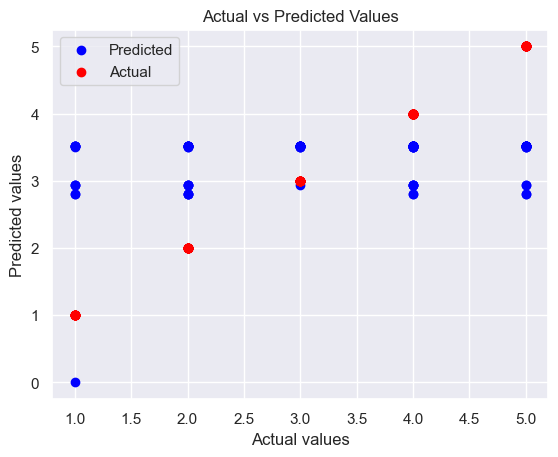

In [49]:
# Create a prediction based on our model and plot it against the actual values
plt.scatter(y, results.fittedvalues, color='blue', label='Predicted')
plt.scatter(y, y, color='red', label='Actual')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

### 3.4.3 <span style='color:#F76241'>|</span> Checking for Normality of Residuals

C:\Users\User\AppData\Local\Temp\ipykernel_25168\3859012682.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(results.resid, fit=norm)


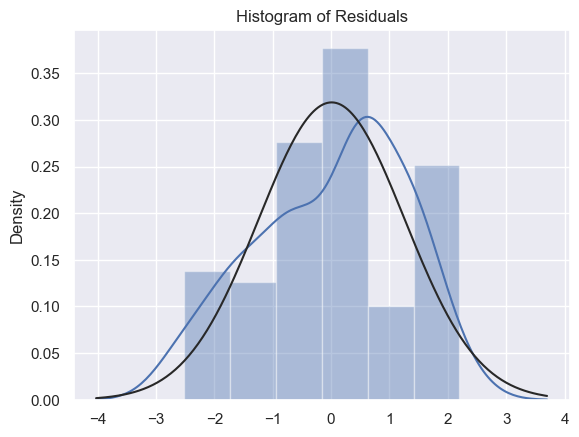

In [50]:
# Plotting the residuals
sns.distplot(results.resid, fit=norm)
plt.title('Histogram of Residuals')
plt.show()

The results also show that the residuals are normally distributed, which means that the model is a good fit for the data.

### 3.4.4 <span style='color:#F76241'>|</span> Further Analysis to show the association between the adoption influencers and the Decision to adopt of AI heat pumps

In [51]:
# Subset the data for only those who chose 'Yes' in Q10
willing_to_adopt = quatt_df[quatt_df['Q10'] == 'Yes']

# Create a contingency table of frequencies
contingency_table = pd.crosstab(willing_to_adopt['Q5'], willing_to_adopt['Q10'])

# Perform the chi-square test of independence
chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)

# Print the chi-square test result
print("Chi-square test result:")
print("Chi-square statistic:", chi2)
print("p-value:", p_value)

# Calculate the observed frequencies rank
rank = contingency_table.sum(axis=1).sort_values(ascending=False)

# Print the rank
print("/nRank of groups who chose 'Yes':")
print(rank)


Chi-square test result:
Chi-square statistic: 0.0
p-value: 1.0
/nRank of groups who chose 'Yes':
Q5
Energy Cost savings        57
Comfort and Ease of use    16
Energy efficiency          14
Environmental impact        8
dtype: int64


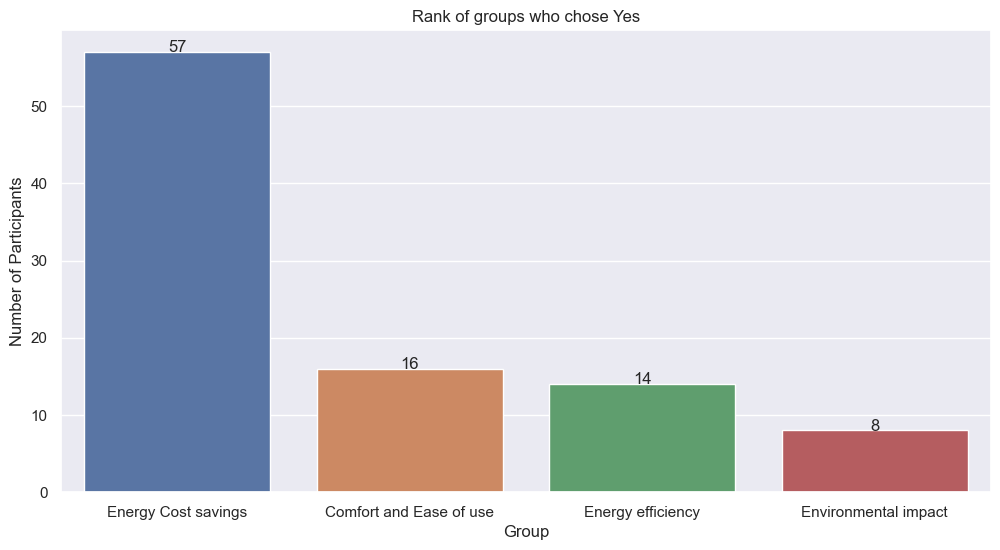

In [52]:
#Plot the distribution of the rank
plt.figure(figsize=(12,6))
ax = sns.barplot(x=rank.index, y=rank.values)

# Add No. of participant labels on top of each bar
for p, count in zip(ax.patches, rank.values):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()    
    ax.annotate(count, (x + width / 2, y + height), ha='center')
    
plt.title('Rank of groups who chose Yes')
plt.xlabel('Group')
plt.ylabel('Number of Participants')
plt.show()

If you have a p-value of 1 in your chi-square test, it means that there is no significant association between the groups being compared. In statistical hypothesis testing, the p-value represents the probability of observing the data (or more extreme data) under the assumption that the null hypothesis is true. A p-value of 1 suggests that the observed data is very likely to occur even if there is no real association between the groups.

In the context of a chi-square test of independence, where you are examining the relationship between two categorical variables, a high p-value (such as 1) indicates that the groups being compared are independent of each other. It means that the observed frequencies in the contingency table are similar to what would be expected by chance alone, and there is no evidence to reject the null hypothesis of independence.

In practical terms, if you have a p-value of 1 in your chi-square test, it suggests that the groups within the 'Q5' variable and the 'Q7' variable (likelihood to adopt) are not associated or related to each other. In other words, the likelihood to adopt AI heat pumps is not related to the factors that influence the buying decision.

### 3.5 <span style='color:#F76241'>|</span> Hypothesis 5: High upfront costs negatively impact the adoption decision of AI-based heat pumps in Europe.

In [53]:
# Chi-square test
cross_tab_barrier = pd.crosstab(quatt_df['Q8'], quatt_df['Q10'])
chi2_barrier, p_value_barrier, _, _ = chi2_contingency(cross_tab_barrier)
print("p-value is: " + str(p_value_barrier))
if p_value_barrier < 0.05:
    print("There is a significant association between barriers and adoption choice.")
else:  
    print("There is no significant association between barriers and adoption choice.")

p-value is: 6.184544577761631e-06
There is a significant association between barriers and adoption choice.


We have seen that there is significant association between adoption barriers and the adoption decision. To further investigate if high upfront costs negatively impact the adoption decision of AI-based heat pumps in Europe, you can perform additional analyses and visualizations. Using descriptive statistics, we can:
- Highlight the distribution of adoption barriers that respondents chose.
- Create a bar plot that displays the proportion of 'Yes' and 'No' responses for adoption choice for each category of Q8 (barriers).

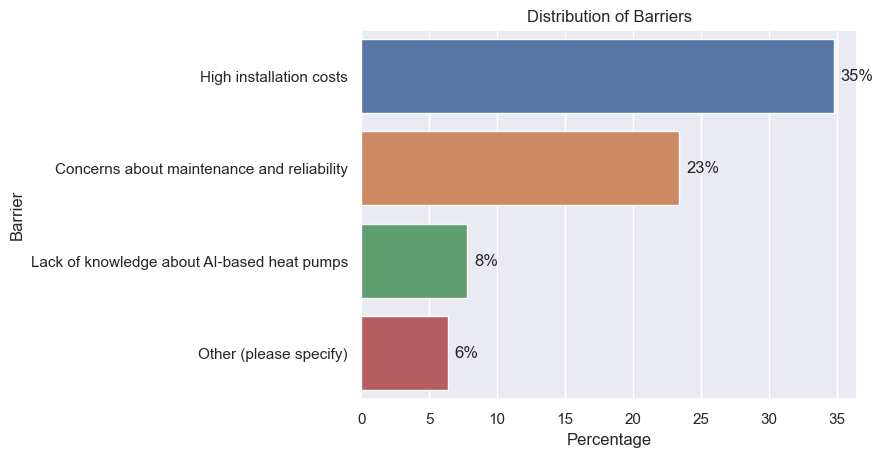

In [54]:
#Create a bar plot that displays the proportion of 'Yes' and 'No' responses for adoption choice for each category of Q8 (barriers).
# Calculate the total count of each barrier
total_count = len(quatt_df)
barrier_counts = quatt_df['Q8'].value_counts()

# Calculate the percentage values
percentage_values = [(count / total_count) * 100 for count in barrier_counts]

# Create a DataFrame to hold barriers and corresponding percentage values
barrier_df = pd.DataFrame({'Barrier': barrier_counts.index, 'Percentage': percentage_values})

# Sort the DataFrame by percentage values in descending order
sorted_barrier_df = barrier_df.sort_values(by='Percentage', ascending=False)

# Plot the countplot with sorted percentage values
ax = sns.barplot(x='Percentage', y='Barrier', data=sorted_barrier_df)

# Add percentage labels on top of each bar
for p, percentage in zip(ax.patches, sorted_barrier_df['Percentage']):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()    
    ax.annotate(f'{round(percentage)}%', (x + width + 0.5, y + height / 2), va='center')

# Set plot title and labels
plt.title('Distribution of Barriers')
plt.xlabel('Percentage')
plt.ylabel('Barrier')
plt.show()

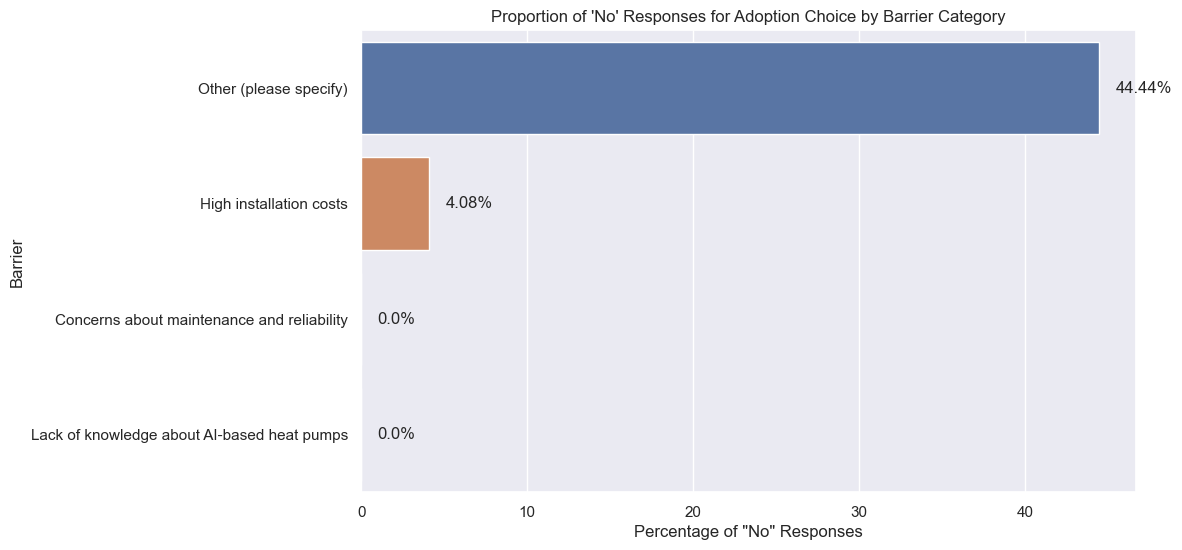

In [55]:
# Create a crosstab of adoption choice and barrier
cross_tab_adoption = pd.crosstab(quatt_df['Q10'], quatt_df['Q8'])

# Calculate the total count for each barrier category
total_count_per_barrier = cross_tab_adoption.sum(axis=0)

# Calculate the percentage values for 'Yes' and 'No' responses for each barrier
percentage_yes = (cross_tab_adoption.loc['Yes'] / total_count_per_barrier) * 100
percentage_no = (cross_tab_adoption.loc['No'] / total_count_per_barrier) * 100

# Create a DataFrame to hold barrier categories, 'Yes' percentage, and 'No' percentage
barrier_adoption_df = pd.DataFrame({'Barrier': cross_tab_adoption.columns, 'Percentage_Yes': percentage_yes, 'Percentage_No': percentage_no})

# Sort the DataFrame by 'Yes' percentage in descending order
sorted_barrier_adoption_df = barrier_adoption_df.sort_values(by='Percentage_No', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Percentage_No', y='Barrier', data=sorted_barrier_adoption_df)

# Add 'Yes' percentage labels on top of each bar
for p, percentage in zip(ax.patches, sorted_barrier_adoption_df['Percentage_No']):
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()    
    ax.annotate(f'{round(percentage, 2)}%', (x + width + 1, y + height / 2), va='center')

# Set plot title and labels
plt.title("Proportion of 'No' Responses for Adoption Choice by Barrier Category")
plt.xlabel('Percentage of "No" Responses')
plt.ylabel('Barrier')
plt.show()


From the above, it is evident that the most prevalent barrier to the adoption of AI-based heat pumps in Europe is high upfront costs.  This means that the high upfront costs negatively impact the adoption decision of AI-based heat pumps in Europe. We therefore accept the null hypothesis.

### 3.6 <span style='color:#F76241'>|</span> Hypothesis 6: Countries that have stronger green energy policies and subsidies have a positive impact on adoption likelihood of AI heat pumps.

The correlation analysis shows that there is no significant correlation between the green energy policies and the adoption likelihood. This means that the adoption likelihood is not significantly influenced by the adoption influencers and green energy policies. We will therefore reject the null hypothesis.

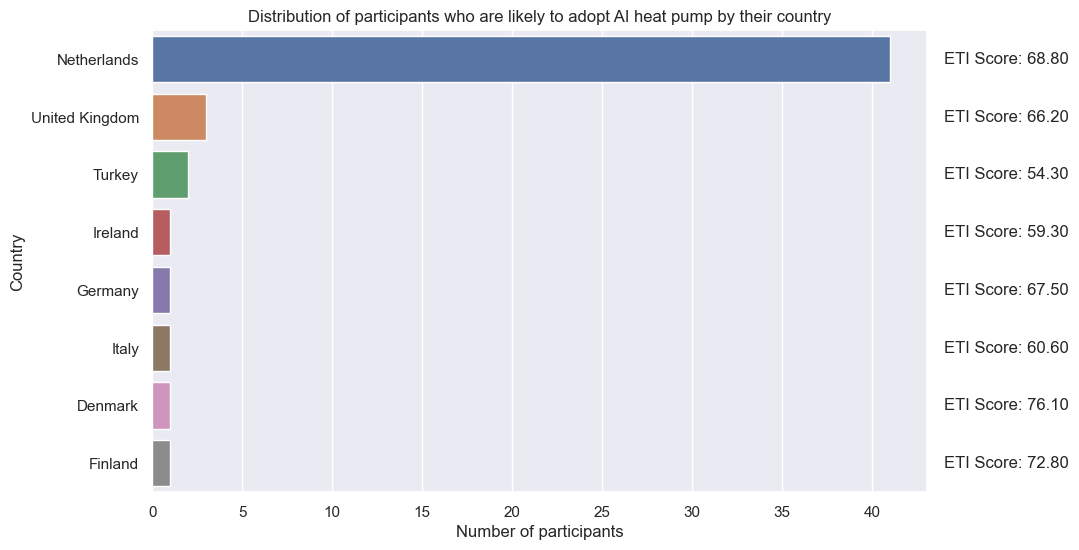

In [56]:
# Subset the data for only those who chose 'Extremely likely and somewhat likely' in Q7
likely_to_adopt = quatt_df[quatt_df['Q7'].isin(['Extremely likely', 'Somewhat likely'])]
#likely_to_adopt = quatt_df[quatt_df['Q10'] == 'Yes']

# Plot the subset data by their country
plt.figure(figsize=(10, 6))
sns.countplot(y='Country', data=likely_to_adopt, order=likely_to_adopt['Country'].value_counts().index)

# Annotate countries with their 'green_policy_score'
for index, value in enumerate(likely_to_adopt['Country'].value_counts().index):
    score = likely_to_adopt[likely_to_adopt['Country'] == value]['green_policy_score'].iloc[0]
    plt.text(likely_to_adopt['Country'].value_counts().max() + 3, index, f'ETI Score: {score:.2f}', va='center')

plt.title('Distribution of participants who are likely to adopt AI heat pump by their country')
plt.xlabel('Number of participants')
plt.ylabel('Country')
plt.show()


In [57]:
# checking for the association between the adoption likelihood and green policy score
# Chi-square test
cross_tab_likely = pd.crosstab(quatt_df['Q7'], quatt_df['green_policy_score'])
chi2_likely, p_value_likely, _, _ = chi2_contingency(cross_tab_likely)
print("p-value is: " + str(p_value_likely))
if p_value_likely < 0.05:
    print("There is a significant association between green policy score and adoption likelihood.")
else:
    print("There is no significant association between green policy score and adoption likelihood.")

p-value is: 0.2587397727594379
There is no significant association between green policy score and adoption likelihood.


The conclusion from the above is that participants from the Netherlands, Germany and the UK are more likely to adopt AI-based Heat pumps. This is in line with the fact that these countries show a high ETI score which reflects a leadership that is aware of the climate change and are willing to take action to reduce their carbon footprint according to the Energy Transition Index (ETI)* of top select countries worldwide in 2021. https://www3.weforum.org/docs/WEF_Fostering_Effective_Energy_Transition_2023.pdf